# The goal of this notebook is to visualize how the method work:

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

Synthetic data generation

In [4]:
n_samples = 100
n_outliers = 50
random_state = 42
cluster_data_points, _ = make_blobs(n_samples=n_samples, centers=1, cluster_std=0.75, random_state=random_state)
outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, 2))

In [21]:
type(outliers)

numpy.ndarray

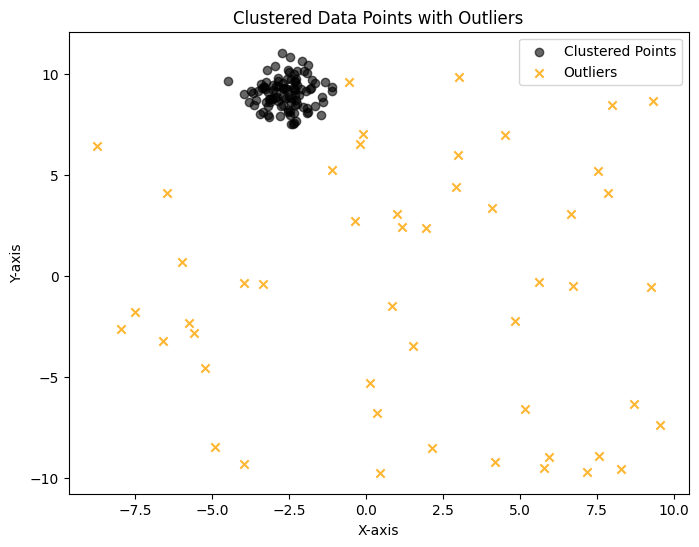

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(cluster_data_points[:, 0], cluster_data_points[:, 1], color='black', label='Clustered Points', alpha=0.6)
plt.scatter(outliers[:, 0], outliers[:, 1], color='orange', marker='x', label='Outliers', alpha=0.8)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Clustered Data Points with Outliers")
plt.legend()
plt.show()

RMK: "The idea is tou don't know the outliers within the dataset"

In [15]:
noisy_data = np.vstack((cluster_data_points, outliers))
noisy_data[0].shape
#outliers[0].shape

(2,)

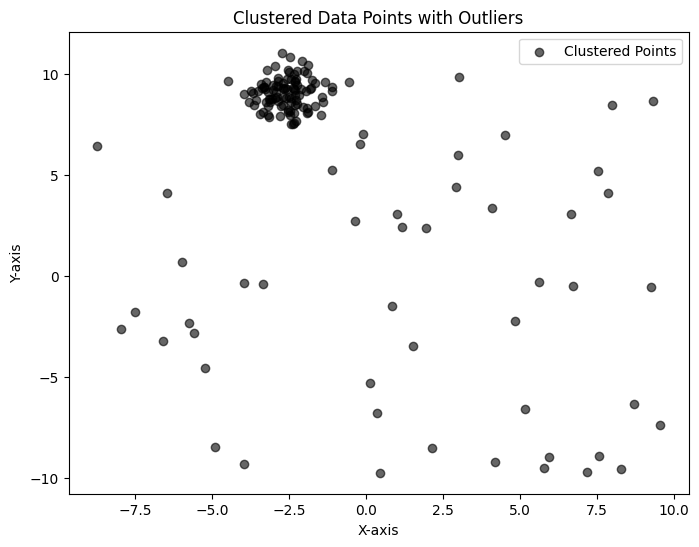

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(noisy_data[:, 0], noisy_data[:, 1], color='black', label='Clustered Points', alpha=0.6)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Clustered Data Points with Outliers")
plt.legend()
plt.show()

Import the built in library

In [8]:
import os
os.chdir("..")
print(os.getcwd())
from src.cluster import Cluster
from src.similarity_based_clustering import mountain_method, largest_cluster, largest_clusters
from src.minimum_covariance_determinant import mcv_robust_clustering

c:\Users\Nicola_Petkovic\Documents\novelContribution\RobustClustering


Hyperparameters

In [22]:
epsilon = 1.0
radius = 1.0
p = 1.0
minimum_data_points = 5
support_fraction = 0.7
largest = True  # Change to False to test the other branch

In [ ]:
phi = Cluster
centers = mountain_method(outliers=noisy_data, epsilon=epsilon, radius=radius, p=p)
o_tilde = largest_cluster(centers=centers.tolist(), outliers=noisy_data, epsilon=epsilon)
phi = mcv_robust_clustering(cluster=o_tilde, minimum_datapoints=minimum_data_points, support_fraction=support_fraction)

150


# RMK: notice the difference in the shape 

In [29]:
print("Shape of starting real cluster without noise:", cluster_data_points.shape)
print("Shape of the estimated cluster :",phi.data_points.shape)

Shape of starting real cluster without noise: (100, 2)
Shape of the estimated cluster : (102, 2)


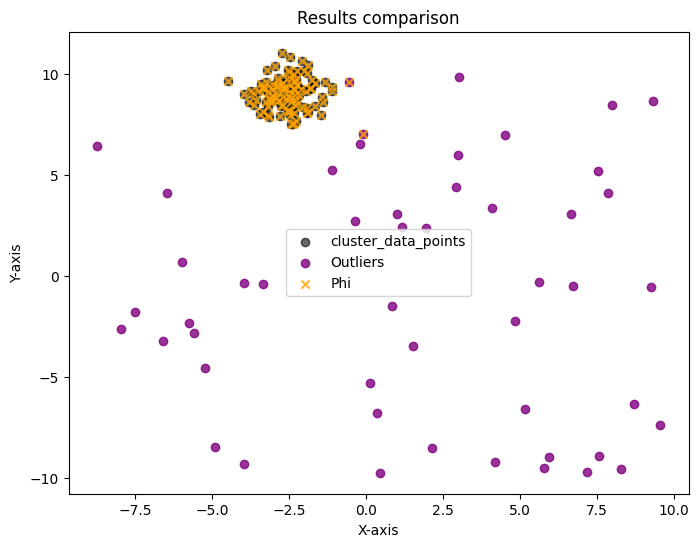

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(cluster_data_points[:, 0], cluster_data_points[:, 1], color='black', label='cluster_data_points', alpha=0.6)
plt.scatter(outliers[:, 0], outliers[:, 1], color='purple', label='Outliers', alpha=0.8)
plt.scatter(phi.data_points[:, 0], phi.data_points[:, 1], color='orange', marker='x', label='Phi', alpha=0.8)


plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Results comparison")
plt.legend()
plt.show()